In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [22]:
def gradientDescent(trainingData,trainingLabel):
    theta=np.zeros((trainingData.shape[1],1))
    for x in range(1000):
        X_theta=np.dot(trainingData,theta)
        dotProd=np.dot(trainingData.T,(sigmoid(X_theta)-np.array([trainingLabel]).T))
        theta=theta-(dotProd*0.001)/len(trainingData)
    return theta

In [23]:
def LogisticRegression(threshold):
    dataSet=pd.read_csv('./input_data/AdmissionDataset.csv').drop(['Serial No.'],axis=1)
    dataSet['Chance of Admit ']=dataSet['Chance of Admit '].apply(lambda x: 1 if x>=threshold else 0)

    dataSet.insert(0,'ones',[1 for x in range(len(dataSet))])

    trainingData=dataSet.sample(frac=0.8)
    validationData=dataSet.drop(trainingData.index)
    
    trainingLabel=trainingData.pop('Chance of Admit ')
    validationLabel=validationData.pop('Chance of Admit ')

    theta=gradientDescent(trainingData,trainingLabel)
    
    predictedLabels=np.squeeze(sigmoid(np.dot(validationData,theta))).tolist()
    predictedLabels=[1 if x>=threshold else 0 for x in predictedLabels]
    
    TP,TN,FP,FN=0,0,0,0
    for a,b in zip(predictedLabels,validationLabel):
        if a==b:
            if a:
                TP+=1
            else:
                TN+=1
        else:
            if a:
                FP+=1
            else:
                FN+=1
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    if(TP+FP==0):
        precision=0
    else:
        precision=(TP)/(TP+FP)
    if(TP+FN==0):
        recall=0
    else:
        recall=(TP)/(TP+FN)
    return accuracy,precision,recall

In [24]:
thresholds=[x/10 for x in range(11)]
accuracies,precisions,recalls=[],[],[]
for x in thresholds:
    a,b,c=LogisticRegression(x)
    accuracies.append(a)
    precisions.append(b)
    recalls.append(c)

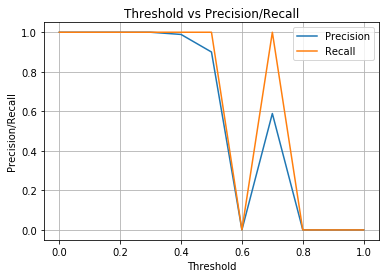

In [25]:
plt.plot(thresholds,precisions,label="Precision")
plt.plot(thresholds,recalls,label="Recall")
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Threshold vs Precision/Recall')
plt.grid(True)
plt.legend()
plt.show()

The graph above, shows the tradeoff between recall and precision.  If the costs of identifying heart disease are small, then it may be appropriate to lower the threshold value to increase recall. Precision will increase but given low costs of incorrectly predicting the presence of heart disease, this may be considered an acceptable trade-off.